# Data Block by fastai
---

In [10]:
from fastai.vision import *
from fastai import *

## MNIST Example

In [4]:
path = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)
path

PosixPath('/home/aman/.fastai/data/mnist_tiny')

In [5]:
path.ls()

[PosixPath('/home/aman/.fastai/data/mnist_tiny/test'),
 PosixPath('/home/aman/.fastai/data/mnist_tiny/valid'),
 PosixPath('/home/aman/.fastai/data/mnist_tiny/models'),
 PosixPath('/home/aman/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/home/aman/.fastai/data/mnist_tiny/train')]

In [7]:
(path/'train').ls()

[PosixPath('/home/aman/.fastai/data/mnist_tiny/train/7'),
 PosixPath('/home/aman/.fastai/data/mnist_tiny/train/3')]

In [14]:
doc(get_transforms)

get_transforms [source] get_transforms ( `do_flip` : bool = `True` , `flip_vert` : bool = `False` , `max_rotate` : float = `10.0` , `max_zoom` : float = `1.1` , `max_lighting` : float = `0.2` , `max_warp` : float = `0.2` , `p_affine` : float = `0.75` , `p_lighting` : float = `0.75` , `xtra_tfms` : Optional [ Collection [ Transform ]]= `None` ) → Collection [ Transform ] 
 
 Utility func to easily create a list of flip, rotate, zoom , warp, lighting transforms. 
 Show in docs

In [15]:
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'scale': (1.0, 1.1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True)])

**Simple Way**

In [16]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=64)

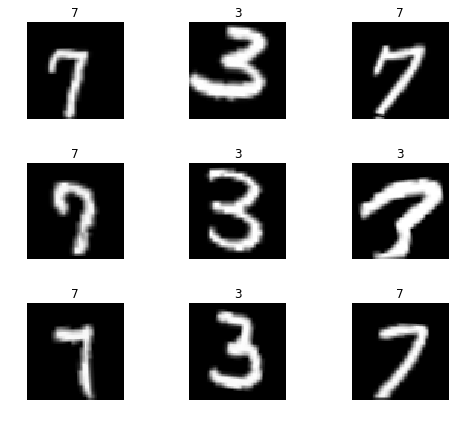

In [18]:
data.show_batch(3, figsize=(7,6))

**Customizable Data Block Way**

In [20]:
doc(ImageImageList.from_folder)

from_folder [source] from_folder ( `path` : PathOrStr = `'.'` , `extensions` : StrList = `None` , `kwargs` ) → ItemList 
 
 Get the list of files in path that have an image suffix. recurse determines if we search subfolders. 
 Show in docs

In [24]:
data = (ImageItemList.from_folder(path)
        .split_by_folder()
        .label_from_folder()
        .add_test_folder()
        .transform(tfms, size=64)
        .databunch())

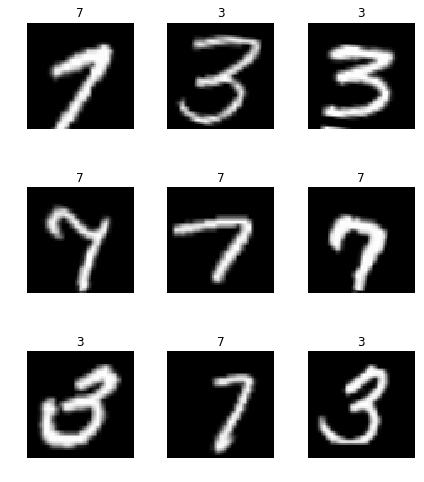

In [27]:
data.show_batch(rows=3, figsize=(6,7))

**Utils**

In [36]:
show_batch = partial(data.show_batch, rows=3, figsize=(6,7))

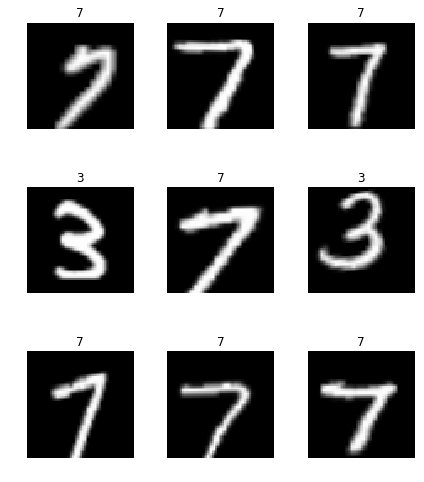

In [38]:
show_batch()

## Amazon Planet Example

In [3]:
path = untar_data(URLs.PLANET_TINY)
path

PosixPath('/home/jupyter/.fastai/data/planet_tiny')

In [74]:
path.ls()

[PosixPath('/home/aman/.fastai/data/planet_tiny/labels.csv'),
 PosixPath('/home/aman/.fastai/data/planet_tiny/train')]

In [75]:
(path/'train').ls()[:5]

[PosixPath('/home/aman/.fastai/data/planet_tiny/train/train_19197.jpg'),
 PosixPath('/home/aman/.fastai/data/planet_tiny/train/train_12129.jpg'),
 PosixPath('/home/aman/.fastai/data/planet_tiny/train/train_28430.jpg'),
 PosixPath('/home/aman/.fastai/data/planet_tiny/train/train_34558.jpg'),
 PosixPath('/home/aman/.fastai/data/planet_tiny/train/train_24990.jpg')]

In [4]:
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_warp=0., max_zoom=1.05)

In [82]:
data = ImageDataBunch.from_csv(path,folder='train',suffix='.jpg',label_delim=' ',
                               ds_tfms=planet_tfms,size=128)

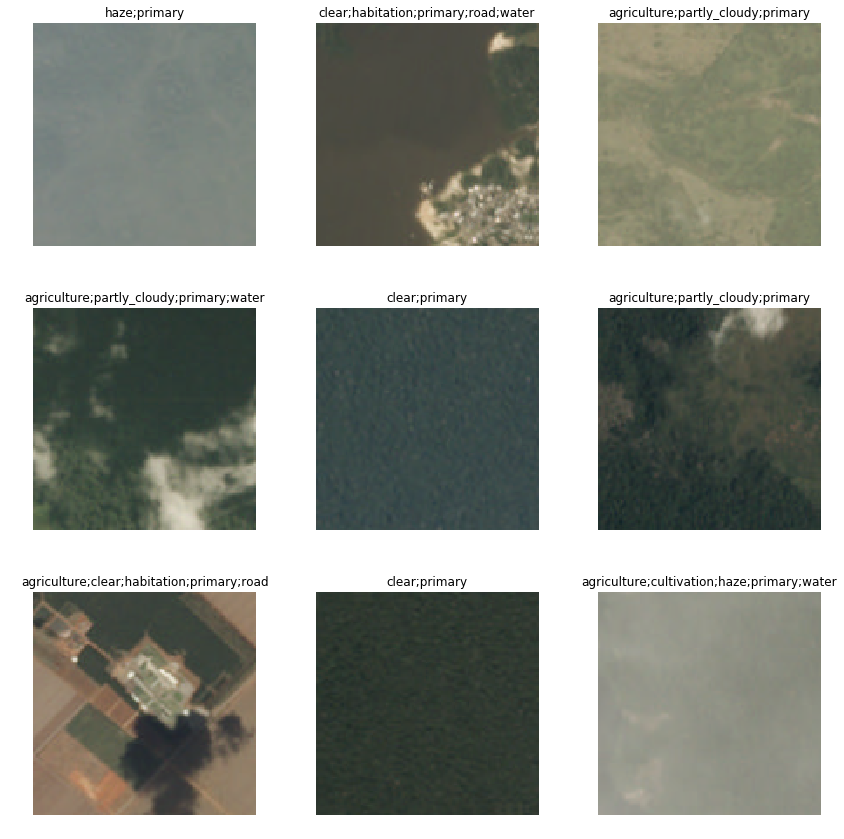

In [87]:
data.show_batch(rows=3)

In [84]:
data = (ImageList.from_csv(path, csv_name='labels.csv', folder='train', suffix='.jpg')
        .random_split_by_pct()
        .label_from_df(label_delim=' ')
        .transform(planet_tfms, size=128)
        .databunch())

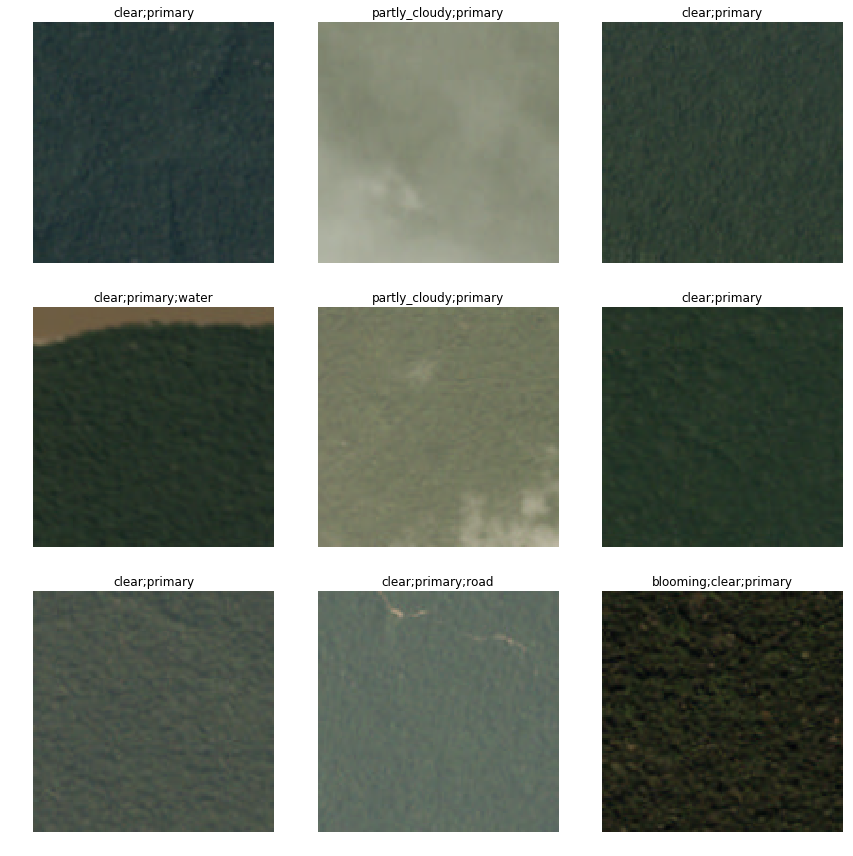

In [86]:
data.show_batch(rows=3)

## Stages of using DataBlock

In [ ]:
data = (ImageList.from_csv(path, csv_name='labels.csv', folder='train', suffix='.jpg')
        .random_split_by_pct()
        .label_from_df(label_delim=' ')
        .transform(planet_tfms, size=128)
        .databunch())

**Step 1: Provide inputs**

In [12]:
item_list = ImageList.from_csv(path, csv_name='labels.csv', folder='train', suffix='.jpg')

In [13]:
type(item_list)

fastai.vision.data.ImageList

In [17]:
dir(item_list)[-10:]

['split_by_fname_file',
 'split_by_folder',
 'split_by_idx',
 'split_by_idxs',
 'split_by_list',
 'split_by_valid_func',
 'split_from_df',
 'to_text',
 'use_partial_data',
 'x']

**Step 2: Split the data between the training and the validation set**

In [18]:
item_list_split = item_list.random_split_by_pct()

In [19]:
type(item_list_split)

fastai.data_block.ItemLists

In [20]:
dir(item_list_split)[-10:]

['label_from_list',
 'label_from_lists',
 'label_from_re',
 'lists',
 'path',
 'test',
 'train',
 'transform',
 'transform_y',
 'valid']

**Step 3: Label the inputs**

In [22]:
item_list_split_label = item_list_split.label_from_df(label_delim=' ')

In [23]:
type(item_list_split_label)

fastai.data_block.LabelLists

In [24]:
dir(item_list_split_label)[-10:]

['lists',
 'load_empty',
 'load_state',
 'path',
 'process',
 'test',
 'train',
 'transform',
 'transform_y',
 'valid']

**Step 4: convert to a DataBunch**

In [25]:
data = item_list_split_label.databunch()

In [26]:
type(data)

fastai.vision.data.ImageDataBunch

In [27]:
dir(data)[-10:]

['show_batch',
 'single_dl',
 'single_ds',
 'single_from_classes',
 'test_dl',
 'test_ds',
 'train_dl',
 'train_ds',
 'valid_dl',
 'valid_ds']

## Camvid Example

In [88]:
path = untar_data(URLs.CAMVID_TINY)
path

PosixPath('/home/aman/.fastai/data/camvid_tiny')

In [93]:
path_img = path/'images'
path_lbl = path/'labels'

---
**To Be Continued...**  
The basics of using a data block has been understood. I can read the documentation and create a databunch for any new tasks. However, I need to practice with image regression, image segmentation, object detection, language modelling, language classification, regression and collaborative filtering tasks to create the databunch from the following datasets:
* BIWI Headpose
* Camvid
* Coco
* IMDB
* Adult (Tabular)
___